In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

pd.set_option('display.max_columns', 100)  # set to 100 columns


In [2]:
loan_csv = pd.read_csv('Loan.csv')

In [3]:
loan_csv.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,DebtToIncomeRatio,BankruptcyHistory,LoanPurpose,PreviousLoanDefaults,PaymentHistory,LengthOfCreditHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,2,Own,183,0.354418,1,2,0.358336,0,Home,0,29,9,7632,1202,146111,19183,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,1,Mortgage,496,0.087827,5,3,0.330274,0,Debt Consolidation,0,21,9,4627,3460,53204,9595,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,2,Rent,902,0.137414,2,0,0.244729,0,Education,0,20,22,886,895,25176,128874,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,1,Mortgage,755,0.267587,2,1,0.436244,0,Home,0,27,10,1675,1217,104822,5370,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,1,Mortgage,274,0.320535,0,0,0.078884,0,Debt Consolidation,0,26,27,1555,4981,244305,17286,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In [4]:
unique_counts = loan_csv.apply(lambda row: row.nunique(), axis=0)
unique_counts

ApplicationDate               20000
Age                              63
AnnualIncome                  17516
CreditScore                     322
EmploymentStatus                  3
EducationLevel                    5
Experience                       62
LoanAmount                    15578
LoanDuration                     10
MaritalStatus                     4
NumberOfDependents                6
HomeOwnershipStatus               4
MonthlyDebtPayments            1299
CreditCardUtilizationRate     20000
NumberOfOpenCreditLines          14
NumberOfCreditInquiries           8
DebtToIncomeRatio             20000
BankruptcyHistory                 2
LoanPurpose                       5
PreviousLoanDefaults              2
PaymentHistory                   38
LengthOfCreditHistory            29
SavingsAccountBalance          9199
CheckingAccountBalance         5151
TotalAssets                   18814
TotalLiabilities              17163
MonthlyIncome                 17489
UtilityBillsPaymentHistory  

In [5]:
loan_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [6]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

def oneHotEncode(df, column):
    encoder = OneHotEncoder()
    encoded_feature = encoder.fit_transform(df[column].values.reshape(-1, 1))
    encoded_feature_names = encoder.get_feature_names_out([column])
    encoded_df = pd.DataFrame(encoded_feature.toarray(), columns=encoded_feature_names)
    df = df.drop(column, axis=1)
    result_df = pd.concat([df, encoded_df], axis=1)
    return result_df
def ordinalEncode(df,column):
    encoder = OrdinalEncoder()
    encoded_feature = encoder.fit_transform(df[column].values.reshape(-1, 1))    
    encoded_df = pd.DataFrame(encoded_feature, columns = [column])
    df = df.drop(column, axis=1)
    result_df = pd.concat([df, encoded_df], axis=1)
    return result_df

loan_csv_cp = loan_csv.copy()

loan_csv_cp = oneHotEncode(loan_csv_cp, 'EmploymentStatus')
loan_csv_cp = oneHotEncode(loan_csv_cp, 'MaritalStatus')
loan_csv_cp = oneHotEncode(loan_csv_cp, 'LoanPurpose')
loan_csv_cp = oneHotEncode(loan_csv_cp, 'HomeOwnershipStatus')
loan_csv_cp = ordinalEncode(loan_csv_cp, 'EducationLevel')

print(loan_csv_cp.shape)
loan_csv_cp

(20000, 48)


,ApplicationDate,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,DebtToIncomeRatio,BankruptcyHistory,PreviousLoanDefaults,PaymentHistory,LengthOfCreditHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore,EmploymentStatus_Employed,EmploymentStatus_Self-Employed,EmploymentStatus_Unemployed,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widowed,LoanPurpose_Auto,LoanPurpose_Debt Consolidation,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HomeOwnershipStatus_Mortgage,HomeOwnershipStatus_Other,HomeOwnershipStatus_Own,HomeOwnershipStatus_Rent,EducationLevel
0,2018-01-01,45,39948,617,22,13152,48,2,183,0.354418,1,2,0.358336,0,0,29,9,7632,1202,146111,19183,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0
1,2018-01-02,38,39709,628,15,26045,48,1,496,0.087827,5,3,0.330274,0,0,21,9,4627,3460,53204,9595,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2018-01-03,47,40724,570,26,17627,36,2,902,0.137414,2,0,0.244729,0,0,20,22,886,895,25176,128874,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,2018-01-04,58,69084,545,34,37898,96,1,755,0.267587,2,1,0.436244,0,0,27,10,1675,1217,104822,5370,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0
4,2018-01-05,37,103264,594,17,9184,36,1,274,0.320535,0,0,0.078884,0,0,26,27,1555,4981,244305,17286,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2072-09-29,44,30180,587,19,24521,36,3,673,0.101288,5,1,0.468077,0,0,21,7,235,3429,80969,25642,2515.000000,0.826217,1,55327,0.216021,0.195574,905.767712,0.627741,0,55.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
19996,2072-09-30,56,49246,567,33,25818,36,5,414,0.471818,2,0,0.317372,0,0,30,28,6910,183,69571,5569,4103.833333,0.816618,3,64002,0.227318,0.199168,958.395633,0.334418,0,54.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19997,2072-10-01,44,48958,645,20,37033,72,3,512,0.216596,3,1,0.023014,0,0,28,8,2175,746,108316,4653,4079.833333,0.887216,3,103663,0.229533,0.226766,945.427454,0.357227,0,45.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
19998,2072-10-02,60,41025,560,36,14760,72,3,986,0.364758,4,1,0.534517,0,0,17,13,3037,260,22085,11485,3418.750000,0.843787,5,10600,0.249760,0.264873,411.168284,0.408678,0,59.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0


In [7]:
from datetime import datetime

def dateToNumericValueEncoding(df, column):
    df[column] = pd.to_datetime(df[column])
    columns = [column + '_Year', column + '_Month', column +'_Day']
    df[columns[0]] = pd.DatetimeIndex(df[column]).year
    df[columns[1]] = pd.DatetimeIndex(df[column]).month
    df[columns[2]] = pd.DatetimeIndex(df[column]).day
    df.drop(column, axis=1, inplace=True)
    return df

loan_csv_cp = dateToNumericValueEncoding(loan_csv_cp, 'ApplicationDate')

loan_csv_cp

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,DebtToIncomeRatio,BankruptcyHistory,PreviousLoanDefaults,PaymentHistory,LengthOfCreditHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore,EmploymentStatus_Employed,EmploymentStatus_Self-Employed,EmploymentStatus_Unemployed,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widowed,LoanPurpose_Auto,LoanPurpose_Debt Consolidation,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HomeOwnershipStatus_Mortgage,HomeOwnershipStatus_Other,HomeOwnershipStatus_Own,HomeOwnershipStatus_Rent,EducationLevel,ApplicationDate_Year,ApplicationDate_Month,ApplicationDate_Day
0,45,39948,617,22,13152,48,2,183,0.354418,1,2,0.358336,0,0,29,9,7632,1202,146111,19183,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0,2018,1,1
1,38,39709,628,15,26045,48,1,496,0.087827,5,3,0.330274,0,0,21,9,4627,3460,53204,9595,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2018,1,2
2,47,40724,570,26,17627,36,2,902,0.137414,2,0,0.244729,0,0,20,22,886,895,25176,128874,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2018,1,3
3,58,69084,545,34,37898,96,1,755,0.267587,2,1,0.436244,0,0,27,10,1675,1217,104822,5370,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0,2018,1,4
4,37,103264,594,17,9184,36,1,274,0.320535,0,0,0.078884,0,0,26,27,1555,4981,244305,17286,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2018,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,44,30180,587,19,24521,36,3,673,0.101288,5,1,0.468077,0,0,21,7,235,3429,80969,25642,2515.000000,0.826217,1,55327,0.216021,0.195574,905.767712,0.627741,0,55.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,2072,9,29
19996,56,49246,567,33,25818,36,5,414,0.471818,2,0,0.317372,0,0,30,28,6910,183,69571,5569,4103.833333,0.816618,3,64002,0.227318,0.199168,958.395633,0.334418,0,54.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2072,9,30
19997,44,48958,645,20,37033,72,3,512,0.216596,3,1,0.023014,0,0,28,8,2175,746,108316,4653,4079.833333,0.887216,3,103663,0.229533,0.226766,945.427454,0.357227,0,45.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,2072,10,1
19998,60,41025,560,36,14760,72,3,986,0.364758,4,1,0.534517,0,0,17,13,3037,260,22085,11485,3418.750000,0.843787,5,10600,0.249760,0.264873,411.168284,0.408678,0,59.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,2072,10,2


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'AnnualIncome'}>,
        <Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'Experience'}>,
        <Axes: title={'center': 'LoanAmount'}>,
        <Axes: title={'center': 'LoanDuration'}>,
        <Axes: title={'center': 'NumberOfDependents'}>],
       [<Axes: title={'center': 'MonthlyDebtPayments'}>,
        <Axes: title={'center': 'CreditCardUtilizationRate'}>,
        <Axes: title={'center': 'NumberOfOpenCreditLines'}>,
        <Axes: title={'center': 'NumberOfCreditInquiries'}>,
        <Axes: title={'center': 'DebtToIncomeRatio'}>,
        <Axes: title={'center': 'BankruptcyHistory'}>,
        <Axes: title={'center': 'PreviousLoanDefaults'}>],
       [<Axes: title={'center': 'PaymentHistory'}>,
        <Axes: title={'center': 'LengthOfCreditHistory'}>,
        <Axes: title={'center': 'SavingsAccountBalance'}>,
        <Axes: title={'center': 'CheckingAccountBalance'}>,
        <Axes: t

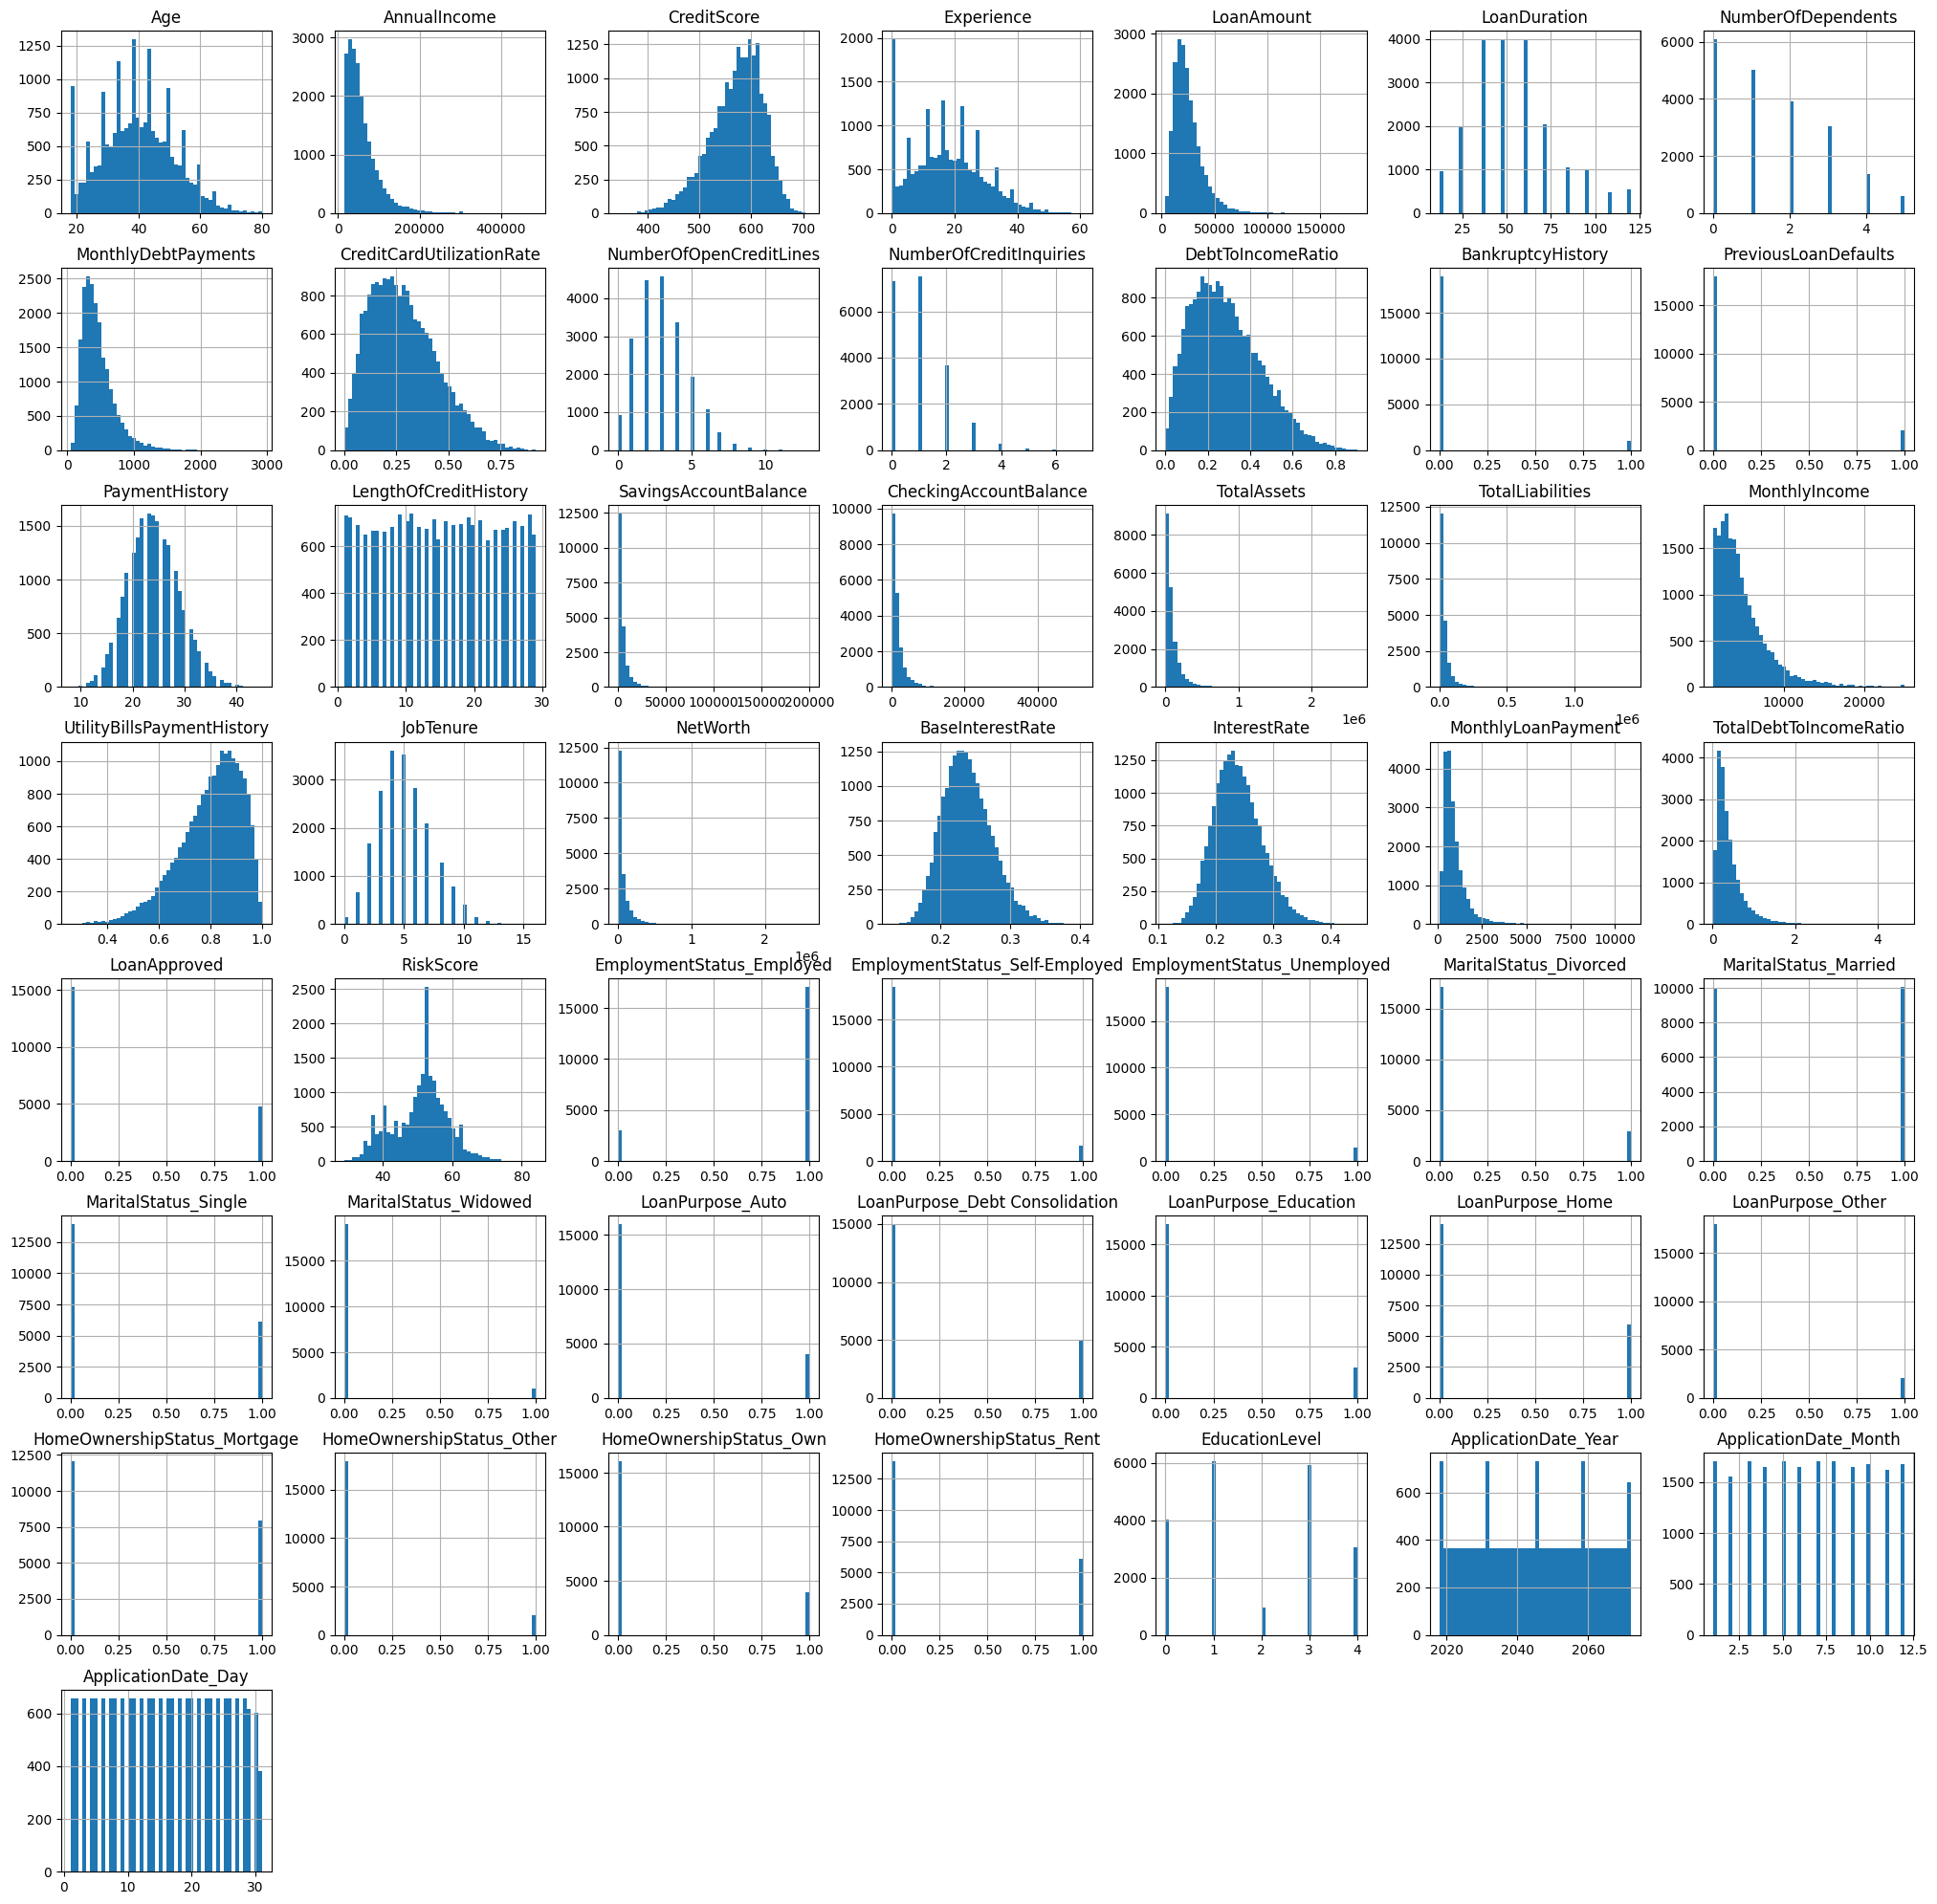

In [8]:
loan_csv_cp.hist(bins=50, figsize=(25, 25))

In [9]:
loan_csv_cp.columns

Index(['Age', 'AnnualIncome', 'CreditScore', 'Experience', 'LoanAmount',
       'LoanDuration', 'NumberOfDependents', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
       'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'PreviousLoanDefaults', 'PaymentHistory', 'LengthOfCreditHistory',
       'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets',
       'TotalLiabilities', 'MonthlyIncome', 'UtilityBillsPaymentHistory',
       'JobTenure', 'NetWorth', 'BaseInterestRate', 'InterestRate',
       'MonthlyLoanPayment', 'TotalDebtToIncomeRatio', 'LoanApproved',
       'RiskScore', 'EmploymentStatus_Employed',
       'EmploymentStatus_Self-Employed', 'EmploymentStatus_Unemployed',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'MaritalStatus_Widowed', 'LoanPurpose_Auto',
       'LoanPurpose_Debt Consolidation', 'LoanPurpose_Education',
       'LoanPurpose_Home', 'LoanPurpose

In [11]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [12]:
#train test split
from sklearn.model_selection import train_test_split

loan_csv_cp_reg = loan_csv_cp.copy()
loan_csv_cp_reg_y = loan_csv_cp_reg['RiskScore']
loan_csv_cp_reg_X = loan_csv_cp_reg.drop(columns=['RiskScore','LoanApproved'])

loan_csv_cp_cls = loan_csv_cp.copy()
loan_csv_cp_cls_y = loan_csv_cp_cls['LoanApproved']
loan_csv_cp_cls_X = loan_csv_cp_cls.drop(columns=['LoanApproved','RiskScore'])


X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(loan_csv_cp_reg_X, loan_csv_cp_reg_y, test_size=0.4, random_state=42)
X_cv_reg, X_test_reg, y_cv_reg, y_test_reg = train_test_split(X_test_reg, y_test_reg, test_size=0.5, random_state=42)

print('X_train_cls_reg shape:', X_train_reg.shape)
print('X_cv_cls_reg shape:', X_cv_reg.shape)
print('X_test_cls_reg shape:', X_test_reg.shape)

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(loan_csv_cp_cls_X, loan_csv_cp_cls_y, test_size=0.4, random_state=42)
X_cv_cls, X_test_cls, y_cv_cls, y_test_cls = train_test_split(X_test_cls, y_test_cls, test_size=0.5, random_state=42)

print('X_train_cls_reg shape:', X_train_cls.shape)
print('X_cv_cls_reg shape:', X_cv_cls.shape)
print('X_test_cls_reg shape:', X_test_cls.shape)

X_train_cls_reg shape: (12000, 48)
X_cv_cls_reg shape: (4000, 48)
X_test_cls_reg shape: (4000, 48)
X_train_cls_reg shape: (12000, 48)
X_cv_cls_reg shape: (4000, 48)
X_test_cls_reg shape: (4000, 48)


In [13]:
# scale, fit transformlari
#features_to_std_scale = ['Age']

features_to_std_scale = ['Age',
                           'AnnualIncome',
                             'CreditScore',
                               'Experience',
                                 'LoanAmount',
       'LoanDuration',
         'NumberOfDependents',
           'MonthlyDebtPayments',
       'CreditCardUtilizationRate',
         'NumberOfOpenCreditLines',
       'NumberOfCreditInquiries',
         'DebtToIncomeRatio',
           #'BankruptcyHistory',
       #'PreviousLoanDefaults',
         'PaymentHistory',
           'LengthOfCreditHistory',
       'SavingsAccountBalance',
         'CheckingAccountBalance',
           'TotalAssets',
       'TotalLiabilities',
         'MonthlyIncome',
           'UtilityBillsPaymentHistory',
       'JobTenure',
         'NetWorth',
           'BaseInterestRate',
             'InterestRate',
       'MonthlyLoanPayment',
         'TotalDebtToIncomeRatio',
        #'EmploymentStatus_Employed',
       #'EmploymentStatus_Self-Employed', 'EmploymentStatus_Unemployed',
       #'MaritalStatus_Divorced', 'MaritalStatus_Married',
       #'MaritalStatus_Single', 'MaritalStatus_Widowed', 'LoanPurpose_Auto',
       #'LoanPurpose_Debt Consolidation', 'LoanPurpose_Education',
       #'LoanPurpose_Home', 'LoanPurpose_Other', 'HomeOwnershipStatus_Mortgage',
       #'HomeOwnershipStatus_Other', 'HomeOwnershipStatus_Own',
       #'HomeOwnershipStatus_Rent', 'EducationLevel', 'ApplicationDate_Year',
       #'ApplicationDate_Month', 'ApplicationDate_Day'
       ]


#regression 
std_scaler_reg = StandardScaler()
std_scaler_reg.fit(X_train_reg.loc[:,features_to_std_scale])

X_train_reg.loc[:,features_to_std_scale] = std_scaler_reg.transform(X_train_reg.loc[:,features_to_std_scale])
X_test_reg.loc[:,features_to_std_scale] =  std_scaler_reg.transform(X_test_reg.loc[:,features_to_std_scale])
X_cv_reg.loc[:,features_to_std_scale] =  std_scaler_reg.transform(X_cv_reg.loc[:,features_to_std_scale])

#classification 
std_scaler_cls = StandardScaler()
std_scaler_cls.fit(X_train_cls.loc[:,features_to_std_scale])

X_train_cls.loc[:,features_to_std_scale] = std_scaler_cls.transform(X_train_cls.loc[:,features_to_std_scale])
X_test_cls.loc[:,features_to_std_scale] = std_scaler_cls.transform(X_test_cls.loc[:,features_to_std_scale])
X_cv_cls.loc[:,features_to_std_scale] = std_scaler_cls.transform(X_cv_cls.loc[:,features_to_std_scale])


C:\Users\metin\AppData\Local\Temp\ipykernel_18188\3199952892.py:48: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.02105614  0.27914972 -1.4414742  ... -0.75322463  0.19311853
 -0.23703745]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train_reg.loc[:,features_to_std_scale] = std_scaler_reg.transform(X_train_reg.loc[:,features_to_std_scale])
C:\Users\metin\AppData\Local\Temp\ipykernel_18188\3199952892.py:48: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.83262176 -0.95670964 -0.6370336  ... -0.2707345  -1.08646387
 -0.34258271]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train_reg.loc[:,features_to_std_scale] = std_scaler_reg.transform(X_train_reg.loc[:,features_to_std_scale])
C:\Users\metin\AppData\Local\Temp\ipykernel_18188\3199952892.py:48: Fu

In [14]:
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential

In [24]:
def create_reg_model(input_shape):
    model = Sequential()
    
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1,activation='linear'))
    
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    
    return model

In [45]:
def create_cls_model(input_shape):
    model = Sequential()
    
    model.add(Dense(64, activation='relu', input_shape=input_shape))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['f1_score'])

    return model

In [46]:
reg_model = create_reg_model(X_train_reg.shape[1:])
cls_model = create_cls_model(X_train_cls.shape[1:])

c:\Users\metin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
reg_model.fit(X_train_reg, y_train_reg, epochs=100, batch_size=32, validation_data=(X_cv_reg, y_cv_reg))

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - accuracy: 0.0000e+00 - loss: 19.0598 - val_accuracy: 0.0000e+00 - val_loss: 17.7403
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - accuracy: 0.0000e+00 - loss: 18.5149 - val_accuracy: 0.0000e+00 - val_loss: 18.7218
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - accuracy: 0.0000e+00 - loss: 18.7065 - val_accuracy: 0.0000e+00 - val_loss: 17.1833
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - accuracy: 0.0000e+00 - loss: 16.9946 - val_accuracy: 0.0000e+00 - val_loss: 19.4145
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - accuracy: 0.0000e+00 - loss: 16.1126 - val_accuracy: 0.0000e+00 - val_loss: 17.7357
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - accuracy: 0.0000e+00 - loss: 15.7274 - val_accuracy: 0.0000e+00 - val_loss: 45.3421
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - accuracy: 0.0000e+00 - loss: 18.8350 - val_accuracy: 0.0000e+00 - val_loss: 18.3097
Epoch 8/100
3

In [31]:
X_train_reg.shape

(12000, 48)

In [32]:
y_train_reg.shape

(12000,)

In [35]:
reg_model.evaluate(X_test_reg,y_test_reg)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - accuracy: 0.0000e+00 - loss: 7.6132


[7.619943618774414, 0.0]

In [47]:
cls_model.fit(X_train_cls,y_train_cls,epochs=100,batch_size=32,validation_data=(X_cv_cls,y_cv_cls))

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 999us/step - f1_score: 0.3441 - loss: 21.2151 - val_f1_score: 0.3952 - val_loss: 0.2102
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - f1_score: 0.3794 - loss: 0.3572 - val_f1_score: 0.3958 - val_loss: 0.1673
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - f1_score: 0.3891 - loss: 0.3347 - val_f1_score: 0.3958 - val_loss: 0.7391
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - f1_score: 0.3934 - loss: 0.3554 - val_f1_score: 0.4134 - val_loss: 0.7670
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step - f1_score: 0.3961 - loss: 0.4207 - val_f1_score: 0.3977 - val_loss: 1.0854
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step - f1_score: 0.3920 - loss: 0.3509 - val_f1_score: 0.4050 - val_loss: 0.1699
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step - f1_score: 0.4019 - loss: 0.2727 - val_f1_score: 0.4296 - val_loss: 0.2873
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step - f1_score: 0.4113 - loss: 

In [48]:
cls_model.evaluate(X_test_cls,y_test_cls)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - f1_score: 0.4007 - loss: 0.1267


[0.11658306419849396, 0.39410677552223206]